In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
/Users/yujing/miniconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
data_path = "./RNA_DE"
cell_type1 = "MLI1"
cell_type2 = "Purkinje"

In [3]:
df = pd.read_csv(os.path.join(data_path, 
                              "deg_deseq2_ensemble_{}_{}.txt".format(cell_type1, cell_type2)), 
                 sep = "\t").reset_index().rename(columns = {"index" : "gene"})
df

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,Itpr1,16.483647,-4.584750,0.139819,-32.790530,8.034926e-236,1.112194e-231
1,Inpp4b,29.045929,7.984603,0.248993,32.067574,1.249037e-225,8.644587e-222
2,Cacna1d,16.532872,4.024296,0.126143,31.902568,2.459865e-223,1.134982e-219
3,Gria4,53.854927,6.494099,0.212808,30.516191,1.589302e-204,5.499781e-201
4,Myt1l,10.212001,4.544244,0.153847,29.537474,9.512129e-192,2.633338e-188
...,...,...,...,...,...,...,...
24404,Gm11426,0.000000,NaN,NaN,NaN,NaN,NaN
24405,Calml3,0.000000,NaN,NaN,NaN,NaN,NaN
24406,Gm2399,0.000000,NaN,NaN,NaN,NaN,NaN
24407,Gm29501,0.000000,NaN,NaN,NaN,NaN,NaN


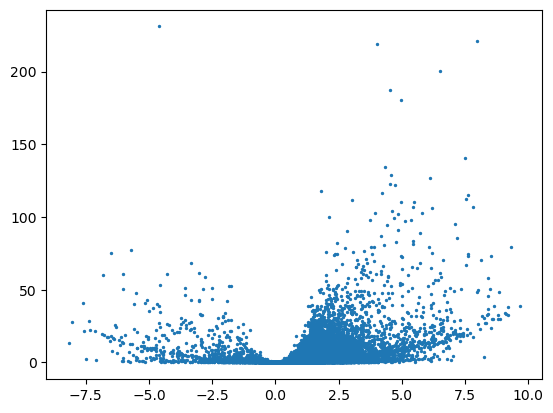

In [4]:
plt.scatter(df["log2FoldChange"], -np.log10(df["padj"]) , s = 2)

# use log fold change 2 / -2 as cuttoff

In [5]:
df[(df["padj"] < 0.01) & (df["log2FoldChange"] > 2)]

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
1,Inpp4b,29.045929,7.984603,0.248993,32.067574,1.249037e-225,8.644587e-222
2,Cacna1d,16.532872,4.024296,0.126143,31.902568,2.459865e-223,1.134982e-219
3,Gria4,53.854927,6.494099,0.212808,30.516191,1.589302e-204,5.499781e-201
4,Myt1l,10.212001,4.544244,0.153847,29.537474,9.512129e-192,2.633338e-188
5,Wbscr17,10.773508,4.966752,0.171485,28.963183,1.914919e-184,4.417719e-181
...,...,...,...,...,...,...,...
7062,Fut10,0.762724,3.356269,1.188841,2.823144,4.755523e-03,9.319829e-03
7078,G0s2,0.313635,3.140427,1.115344,2.815657,4.867757e-03,9.518222e-03
7079,Crispld1,0.386897,2.625056,0.932712,2.814434,4.886323e-03,9.553176e-03
7082,Rgs16,0.270755,4.832142,1.718436,2.811942,4.924336e-03,9.622140e-03


In [6]:
df[(df["padj"] < 0.01) & (df["log2FoldChange"] < -2)]

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,Itpr1,16.483647,-4.584750,0.139819,-32.790530,8.034926e-236,1.112194e-231
48,Cdh18,17.965835,-5.699085,0.299898,-19.003409,1.598201e-80,4.514754e-78
52,Cntnap5b,3.618299,-6.505568,0.346489,-18.775671,1.194295e-78,3.119139e-76
68,Zdhhc14,5.373692,-3.322247,0.185707,-17.889743,1.417617e-71,2.843864e-69
88,Inpp5a,2.944064,-3.004924,0.176933,-16.983375,1.090315e-64,1.695747e-62
...,...,...,...,...,...,...,...
7044,Wnt3,0.319712,-2.870220,1.013517,-2.831941,4.626645e-03,9.090421e-03
7045,Exd1,0.175511,-3.254763,1.149489,-2.831486,4.633233e-03,9.102074e-03
7046,Gm12158,0.462728,-3.491026,1.233220,-2.830822,4.642861e-03,9.119694e-03
7085,Golm1,1.169499,-2.204479,0.784296,-2.810774,4.942248e-03,9.654332e-03


# proceed with threshold 2 first

In [7]:
# check foldchange Granule cell marker gene
df[df["gene"].isin(["Lypd6", "Ppp1r17"])]
# fold change is calculated by granule / purkinje

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
978,Ppp1r17,0.801908,-5.127301,0.559298,-9.16739,4.846086e-20,6.846070e-19
5317,Lypd6,0.860270,8.261376,2.072967,3.98529,6.739782e-05,1.754270e-04


In [8]:
category = np.zeros(df.shape[0]).astype(object)
category[(df["padj"] < 0.01) & (df["log2FoldChange"] > 2)] = cell_type1
category[(df["padj"] < 0.01) & (df["log2FoldChange"] < -2)] = cell_type2

In [9]:
df["category"] = category
df.head()

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,category
0,Itpr1,16.483647,-4.584750,0.139819,-32.790530,8.034926e-236,1.112194e-231,Purkinje
1,Inpp4b,29.045929,7.984603,0.248993,32.067574,1.249037e-225,8.644587e-222,MLI1
2,Cacna1d,16.532872,4.024296,0.126143,31.902568,2.459865e-223,1.134982e-219,MLI1
3,Gria4,53.854927,6.494099,0.212808,30.516191,1.589302e-204,5.499781e-201,MLI1
4,Myt1l,10.212001,4.544244,0.153847,29.537474,9.512129e-192,2.633338e-188,MLI1


In [10]:
df[df["gene"].isin(["Lypd6", "Ppp1r17"])]

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,category
978,Ppp1r17,0.801908,-5.127301,0.559298,-9.16739,4.846086e-20,6.846070e-19,Purkinje
5317,Lypd6,0.860270,8.261376,2.072967,3.98529,6.739782e-05,1.754270e-04,MLI1


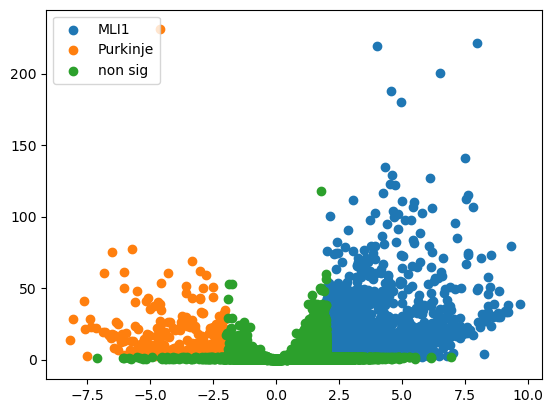

In [11]:
plt.scatter(df[df["category"] == cell_type1]["log2FoldChange"], -np.log10(df[df["category"] == cell_type1]["padj"]), label = cell_type1)
plt.scatter(df[df["category"] == cell_type2]["log2FoldChange"], -np.log10(df[df["category"] == cell_type2]["padj"]), label = cell_type2 )
plt.scatter(df[df["category"] == 0]["log2FoldChange"], -np.log10(df[df["category"] == 0]["padj"]), label = "non sig" )
plt.legend()

In [12]:
DE_genes = df[df["category"] != 0]
DE_genes

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,category
0,Itpr1,16.483647,-4.584750,0.139819,-32.790530,8.034926e-236,1.112194e-231,Purkinje
1,Inpp4b,29.045929,7.984603,0.248993,32.067574,1.249037e-225,8.644587e-222,MLI1
2,Cacna1d,16.532872,4.024296,0.126143,31.902568,2.459865e-223,1.134982e-219,MLI1
3,Gria4,53.854927,6.494099,0.212808,30.516191,1.589302e-204,5.499781e-201,MLI1
4,Myt1l,10.212001,4.544244,0.153847,29.537474,9.512129e-192,2.633338e-188,MLI1
...,...,...,...,...,...,...,...,...
7079,Crispld1,0.386897,2.625056,0.932712,2.814434,4.886323e-03,9.553176e-03,MLI1
7082,Rgs16,0.270755,4.832142,1.718436,2.811942,4.924336e-03,9.622140e-03,MLI1
7085,Golm1,1.169499,-2.204479,0.784296,-2.810774,4.942248e-03,9.654332e-03,Purkinje
7096,Fras1,0.209670,-3.745013,1.335925,-2.803312,5.058079e-03,9.865285e-03,Purkinje


# Map back to genome

In [13]:
meta = pd.read_csv(os.path.join("../annot", "Final", "mm10_25kb_bins_genes_09022022.csv"))
meta = meta[["name", "chrom", "start", "end", "gene", "100kb name", "100kb bin", "200kb name", "200kb bin"]]
meta["gene"] = meta["gene"].str.replace("-", ".")

# Mismatch between DE gene naming and annotated namming

In [14]:
DE_sig_25kb = meta.merge(DE_genes)

In [15]:
# missing genes
miss_genes = [x for x in DE_genes["gene"]  if x not in DE_sig_25kb["gene"].unique()]
print ("missing {} gene, {} of detected DE genes".format(len(miss_genes), len(miss_genes) / DE_genes.shape[0]) )

# missing gene are not trivial
miss_df = df[df["gene"].isin(miss_genes)]
miss_df

missing 244 gene, 0.07883683360258481 of detected DE genes


,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,category
5,Wbscr17,10.773508,4.966752,0.171485,28.963183,1.914919e-184,4.417719e-181,MLI1
44,Gbas,5.739609,3.779968,0.196363,19.249866,1.415294e-82,4.353443e-80,MLI1
69,Zcchc16,6.610132,5.730593,0.321031,17.850617,2.858621e-71,5.573104e-69,MLI1
165,Fam63b,4.241761,2.377108,0.160029,14.854237,6.530679e-50,5.445642e-48,MLI1
182,Gm11417,2.557113,4.998693,0.343225,14.563902,4.765831e-48,3.604843e-46,MLI1
...,...,...,...,...,...,...,...,...
6991,X2700081O15Rik,0.403653,3.417028,1.192738,2.864859,4.171945e-03,8.259163e-03,MLI1
6992,Gm15689,0.409256,3.185232,1.112135,2.864069,4.182375e-03,8.278626e-03,MLI1
7022,Gm13008,0.526333,2.086724,0.733851,2.843524,4.461771e-03,8.793940e-03,MLI1
7046,Gm12158,0.462728,-3.491026,1.233220,-2.830822,4.642861e-03,9.119694e-03,Purkinje


# OK! tried our best to get all genes

In [16]:
DE_sig_25kb["200kb bin"] = DE_sig_25kb["start"] // 200000
DE_sig_25kb["200kb name"] = DE_sig_25kb["chrom"] + "-g" + DE_sig_25kb["200kb bin"].astype(str)

In [17]:
cols = ["200kb name","chrom", "200kb bin", "gene", "baseMean", "log2FoldChange", "pvalue", "padj", "category"]

In [18]:
DE_sig_200kb = DE_sig_25kb.copy()
# Get DE norm counts
# Do not repeat count version
DE_sig_200kb_no_dup = DE_sig_200kb.drop_duplicates(subset=["gene", "200kb name"], keep='first')

In [19]:
DE_sig_200kb_no_dup

,name,chrom,start,end,gene,100kb name,100kb bin,200kb name,200kb bin,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,category
0,chr1-9,chr1,3200000,3225000,Xkr4,chr1-g32,32.0,chr1-g16,16,15.790706,3.130129,0.207239,15.103960,1.524923e-51,1.379607e-49,MLI1
8,chr1-17,chr1,3400000,3425000,Xkr4,chr1-g34,34.0,chr1-g17,17,15.790706,3.130129,0.207239,15.103960,1.524923e-51,1.379607e-49,MLI1
16,chr1-25,chr1,3600000,3625000,Xkr4,chr1-g36,36.0,chr1-g18,18,15.790706,3.130129,0.207239,15.103960,1.524923e-51,1.379607e-49,MLI1
19,chr1-77,chr1,4900000,4925000,Rgs20,chr1-g49,49.0,chr1-g24,24,3.414300,3.827827,0.414158,9.242441,2.409368e-20,3.503201e-19,MLI1
23,chr1-81,chr1,5000000,5025000,Rgs20,chr1-g50,50.0,chr1-g25,25,3.414300,3.827827,0.414158,9.242441,2.409368e-20,3.503201e-19,MLI1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12865,chrX-6291,chrX,163000000,163025000,Ctps2,chrX-g1630,1630.0,chrX-g815,815,1.307185,2.929224,0.336454,8.706157,3.143502e-18,3.780395e-17,MLI1
12867,chrX-6328,chrX,163925000,163950000,Zrsr2,chrX-g1639,1639.0,chrX-g819,819,1.026561,2.228138,0.601171,3.706331,2.102834e-04,5.083380e-04,MLI1
12869,chrX-6420,chrX,166225000,166250000,Gpm6b,chrX-g1662,1662.0,chrX-g831,831,13.111098,4.084340,0.406020,10.059459,8.345544e-24,1.591171e-22,MLI1
12876,chrX-6428,chrX,166425000,166450000,Trappc2,chrX-g1664,1664.0,chrX-g832,832,0.443060,2.500465,0.550359,4.543337,5.537051e-06,1.696411e-05,MLI1


In [20]:
# get norm counts
norm_counts = pd.read_csv(os.path.join(data_path, 
                                       "ensembl_gene_counts_normalized.txt"), sep = "\t")

idx = (norm_counts.iloc[0].isin([cell_type1 ,cell_type2, "CLUSTER"])).values

norm_counts = norm_counts.iloc[:, idx]

# take a look
norm_counts.head()

/var/folders/j4/wgbmg2rn5q768jr012zxqngh0000gn/T/ipykernel_54919/238531082.py:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122) have mixed types. Specify dtype option on import or set low_memory=False.
  norm_counts = pd.read_csv(os.path.join(data_path,


,ID,VIIa_F002.8,VIIa_M002.9,VIIa_M006.9,VIIb_F002.8,VIIb_M002.7,VIIb_M006.8,VIIc_M002.8,VIId_M002.9,VIIa_F002.13,VIIa_M002.14,VIIa_M006.14,VIIb_F002.13,VIIb_M002.12,VIIb_M006.13,VIIc_M002.13,VIId_M002.14
0,CLUSTER,MLI1,MLI1,MLI1,MLI1,MLI1,MLI1,MLI1,MLI1,Purkinje,Purkinje,Purkinje,Purkinje,Purkinje,Purkinje,Purkinje,Purkinje
1,Xkr4,53.5948272840804,43.279884611744,61.2805288139014,41.5969990510138,49.2577139285487,53.8271418006571,59.7718668656137,62.6031475874452,4.24757424683673,7.32575539639509,6.77040272954583,4.88759111929643,5.98418574980771,6.4782076952491,7.64406096738078,5.28790896346163
2,Gm1992,5.62675352063836,8.41553311895023,7.47830182135745,5.25761326295341,5.61163829565745,4.61375501148489,10.3829064508343,12.0060830989621,1.21359264195335,0.754121879040671,1.1284004549243,0.610948889912054,1.07715343496539,1.06358633802597,1.31382297876857,1.61574996105772
3,Gm37381,0.140668838015959,0.300554754248222,0.207730606148818,0,0,0,0,0,0.0606796320976676,0,0,0,0,0,0,0
4,Rp1,0,0,0.207730606148818,0,0,0,0,0,0.121359264195335,0.10773169700581,0.14560005869991,0.0678832099902282,0,0.0966896670932702,0.119438452615325,0


In [21]:
n1 = ["{}_{}".format(cell_type1, i) for i in range(1, 9)]
n2 = ["{}_{}".format(cell_type2, i) for i in range(1, 9)]

norm_counts.columns = ['gene'] + n1 + n2
norm_counts = norm_counts.iloc[1:].reset_index(drop = True)
norm_counts.head()
# turn dataframes to numeric
norm_counts[n1 + n2] = norm_counts[n1 + n2].apply(pd.to_numeric, errors='coerce')

In [22]:
norm_counts["{}_mean".format(cell_type1)] = norm_counts[n1].mean(axis=1)
norm_counts["{}_mean".format(cell_type2)] = norm_counts[n2].mean(axis=1)
norm_counts

,gene,MLI1_1,MLI1_2,MLI1_3,MLI1_4,MLI1_5,MLI1_6,MLI1_7,MLI1_8,Purkinje_1,Purkinje_2,Purkinje_3,Purkinje_4,Purkinje_5,Purkinje_6,Purkinje_7,Purkinje_8,MLI1_mean,Purkinje_mean
0,Xkr4,53.594827,43.279885,61.280529,41.596999,49.257714,53.827142,59.771867,62.603148,4.247574,7.325755,6.770403,4.887591,5.984186,6.478208,7.644061,5.287909,53.151514,6.078211
1,Gm1992,5.626754,8.415533,7.478302,5.257613,5.611638,4.613755,10.382906,12.006083,1.213593,0.754122,1.128400,0.610949,1.077153,1.063586,1.313823,1.615750,7.424073,1.097172
2,Gm37381,0.140669,0.300555,0.207731,0.000000,0.000000,0.000000,0.000000,0.000000,0.060680,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.081119,0.007585
3,Rp1,0.000000,0.000000,0.207731,0.000000,0.000000,0.000000,0.000000,0.000000,0.121359,0.107732,0.145600,0.067883,0.000000,0.096690,0.119438,0.000000,0.025966,0.082338
4,Sox17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24404,Gm11426,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
24405,Calml3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
24406,Gm2399,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
24407,Gm29501,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [23]:
# filter out DE genes get norm counts
DE_sig_200kb_no_dup = DE_sig_200kb_no_dup.merge(norm_counts[["gene","{}_mean".format(cell_type1), "{}_mean".format(cell_type2)]])
DE_sig_200kb_no_dup.to_csv(os.path.join(data_path, "{}_{}_DE_sig_sum_200kb_no_dup.csv".format(cell_type1, cell_type2)), index = None)

In [24]:
DE_sig_200kb_no_dup

,name,chrom,start,end,gene,100kb name,100kb bin,200kb name,200kb bin,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,category,MLI1_mean,Purkinje_mean
0,chr1-9,chr1,3200000,3225000,Xkr4,chr1-g32,32.0,chr1-g16,16,15.790706,3.130129,0.207239,15.103960,1.524923e-51,1.379607e-49,MLI1,53.151514,6.078211
1,chr1-17,chr1,3400000,3425000,Xkr4,chr1-g34,34.0,chr1-g17,17,15.790706,3.130129,0.207239,15.103960,1.524923e-51,1.379607e-49,MLI1,53.151514,6.078211
2,chr1-25,chr1,3600000,3625000,Xkr4,chr1-g36,36.0,chr1-g18,18,15.790706,3.130129,0.207239,15.103960,1.524923e-51,1.379607e-49,MLI1,53.151514,6.078211
3,chr1-77,chr1,4900000,4925000,Rgs20,chr1-g49,49.0,chr1-g24,24,3.414300,3.827827,0.414158,9.242441,2.409368e-20,3.503201e-19,MLI1,1.866258,0.108034
4,chr1-81,chr1,5000000,5025000,Rgs20,chr1-g50,50.0,chr1-g25,25,3.414300,3.827827,0.414158,9.242441,2.409368e-20,3.503201e-19,MLI1,1.866258,0.108034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4085,chrX-6291,chrX,163000000,163025000,Ctps2,chrX-g1630,1630.0,chrX-g815,815,1.307185,2.929224,0.336454,8.706157,3.143502e-18,3.780395e-17,MLI1,1.755918,0.214354
4086,chrX-6328,chrX,163925000,163950000,Zrsr2,chrX-g1639,1639.0,chrX-g819,819,1.026561,2.228138,0.601171,3.706331,2.102834e-04,5.083380e-04,MLI1,0.637306,0.152183
4087,chrX-6420,chrX,166225000,166250000,Gpm6b,chrX-g1662,1662.0,chrX-g831,831,13.111098,4.084340,0.406020,10.059459,8.345544e-24,1.591171e-22,MLI1,3.163924,0.171695
4088,chrX-6428,chrX,166425000,166450000,Trappc2,chrX-g1664,1664.0,chrX-g832,832,0.443060,2.500465,0.550359,4.543337,5.537051e-06,1.696411e-05,MLI1,0.632280,0.100754


In [25]:
temp = {"category" : ",".join, 
        "{}_mean".format(cell_type1) : sum,
        "{}_mean".format(cell_type2) : sum,
        "gene": ",".join}
final_200kb = DE_sig_200kb_no_dup.groupby("200kb name").agg(temp).reset_index()

In [26]:
final_200kb

,200kb name,category,MLI1_mean,Purkinje_mean,gene
0,chr1-g104,MLI1,1.622225,0.229585,Paqr8
1,chr1-g106,"MLI1,MLI1",5.399346,0.392818,"Tmem14a,Kcnq5"
2,chr1-g107,MLI1,4.785520,0.265860,Kcnq5
3,chr1-g108,MLI1,4.785520,0.265860,Kcnq5
4,chr1-g109,MLI1,4.785520,0.265860,Kcnq5
...,...,...,...,...,...
3272,chrX-g815,MLI1,1.755918,0.214354,Ctps2
3273,chrX-g819,MLI1,0.637306,0.152183,Zrsr2
3274,chrX-g831,MLI1,3.163924,0.171695,Gpm6b
3275,chrX-g832,MLI1,0.632280,0.100754,Trappc2


In [27]:
# further format
final_200kb["chrom"]  = final_200kb["200kb name"].str.split("-").str[0]
# add small number to 0
final_200kb = final_200kb.replace(0, 0.05)
final_200kb 

,200kb name,category,MLI1_mean,Purkinje_mean,gene,chrom
0,chr1-g104,MLI1,1.622225,0.229585,Paqr8,chr1
1,chr1-g106,"MLI1,MLI1",5.399346,0.392818,"Tmem14a,Kcnq5",chr1
2,chr1-g107,MLI1,4.785520,0.265860,Kcnq5,chr1
3,chr1-g108,MLI1,4.785520,0.265860,Kcnq5,chr1
4,chr1-g109,MLI1,4.785520,0.265860,Kcnq5,chr1
...,...,...,...,...,...,...
3272,chrX-g815,MLI1,1.755918,0.214354,Ctps2,chrX
3273,chrX-g819,MLI1,0.637306,0.152183,Zrsr2,chrX
3274,chrX-g831,MLI1,3.163924,0.171695,Gpm6b,chrX
3275,chrX-g832,MLI1,0.632280,0.100754,Trappc2,chrX


In [28]:
# rank final output
final_200kb["chrom_id"] = final_200kb["chrom"].str[3:].replace("X", 20).astype(int)
final_200kb["group"] = final_200kb["200kb name"].str.split("-").str[1].str[1:].astype(int)
final_200kb = final_200kb.sort_values(by = ["chrom_id", "group"])
final_200kb["log2FC_{}2{}".format(cell_type1[:1], cell_type2[:1])] =  np.log2(final_200kb["{}_mean".format(cell_type1)].values / final_200kb["{}_mean".format(cell_type2)].values)
final_200kb

,200kb name,category,MLI1_mean,Purkinje_mean,gene,chrom,chrom_id,group,log2FC_M2P
14,chr1-g16,MLI1,53.151514,6.078211,Xkr4,chr1,1,16,3.128392
16,chr1-g17,MLI1,53.151514,6.078211,Xkr4,chr1,1,17,3.128392
20,chr1-g18,MLI1,53.151514,6.078211,Xkr4,chr1,1,18,3.128392
35,chr1-g24,MLI1,1.866258,0.108034,Rgs20,chr1,1,24,4.110590
36,chr1-g25,MLI1,1.866258,0.108034,Rgs20,chr1,1,25,4.110590
...,...,...,...,...,...,...,...,...,...
3272,chrX-g815,MLI1,1.755918,0.214354,Ctps2,chrX,20,815,3.034160
3273,chrX-g819,MLI1,0.637306,0.152183,Zrsr2,chrX,20,819,2.066179
3274,chrX-g831,MLI1,3.163924,0.171695,Gpm6b,chrX,20,831,4.203798
3275,chrX-g832,MLI1,0.632280,0.100754,Trappc2,chrX,20,832,2.649728


In [29]:
final_200kb.to_csv(os.path.join(data_path, "{}_{}_DE_200kb_FoldChange.csv".format(cell_type1, cell_type2)), index = False)